## **Reporte** - Fuentes de Información
* 7 de Marzo del 2025
#### ESCOM - IPN: *Modelado Predictivo*
#### Prof. Claudia Blanquel

#### *Lic. Ciencia de Datos* - 6AM1

> Armas Ramirez Daniel

> Gutierrez Ramirez Alana Sofia

> Hernández Peña Irving Jafet

> Reyes Maldonado Oscar Romario

> Sanchez Garcia Miguel Alexander

#### **0° Introducción**

Datos obtenidos de:

> https://www.inegi.org.mx/programas/enigh/nc/2020/#datos_abiertos

**a.** Como primer paso, necesitamos **importar** todas las **librerias** que usaremos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

#### **1° Extracción de Datos**

In [2]:
# Datos sociodemográficos
hogares = pd.read_csv('datasets-ENIGH/conjunto_de_datos_hogares_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_hogares_enigh_2016_ns.csv')
viviendas = pd.read_csv('datasets-ENIGH/conjunto_de_datos_viviendas_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_viviendas_enigh_2016_ns.csv')
poblacion = pd.read_csv('datasets-ENIGH/conjunto_de_datos_poblacion_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh_2016_ns.csv')

# Datos Económicos
erogaciones = pd.read_csv('datasets-ENIGH/conjunto_de_datos_erogaciones_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_erogaciones_enigh_2016_ns.csv')
gastoshogar = pd.read_csv('datasets-ENIGH/conjunto_de_datos_gastoshogar_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_gastoshogar_enigh_2016_ns.csv')
gastotarjetas = pd.read_csv('datasets-ENIGH/conjunto_de_datos_gastotarjetas_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_gastotarjetas_enigh_2016_ns.csv')

# Datos de Ingresos
ingresos_enigh = pd.read_csv('datasets-ENIGH/conjunto_de_datos_ingresos_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh_2016_ns.csv')

# Datos Totales de ingresos
concentradohogar = pd.read_csv('datasets-ENIGH/conjunto_de_datos_concentradohogar_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_concentradohogar_enigh_2016_ns.csv')

# Datos sobre trabajo
trabajos = pd.read_csv('datasets-ENIGH/conjunto_de_datos_trabajos_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_trabajos_enigh_2016_ns.csv')

/var/folders/0p/s82cs_hd6y38lrx5wgk261kr0000gn/T/ipykernel_97633/1428968708.py:2: DtypeWarning: Columns (40,42,44,48,50,58,60,62,64,72,74,76,78,80,82,84,88,92,96) have mixed types. Specify dtype option on import or set low_memory=False.
  hogares = pd.read_csv('datasets-ENIGH/conjunto_de_datos_hogares_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_hogares_enigh_2016_ns.csv')
/var/folders/0p/s82cs_hd6y38lrx5wgk261kr0000gn/T/ipykernel_97633/1428968708.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  viviendas = pd.read_csv('datasets-ENIGH/conjunto_de_datos_viviendas_enigh_2016_ns/conjunto_de_datos/conjunto_de_datos_viviendas_enigh_2016_ns.csv')
/var/folders/0p/s82cs_hd6y38lrx5wgk261kr0000gn/T/ipykernel_97633/1428968708.py:4: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  poblacion = pd.read_csv('datasets-ENIGH/conjunto_de_datos_poblacion_enigh_2016_ns/conjunto_de_datos/co

#### **1° EDA (Análisis Exploratorio de Datos)**

##### *Datos Generales*

**a.** **Dimensiones** de los dataframes

In [3]:
# Dimensiones de los datos
print('Hogares:', hogares.shape)
print('Viviendas:', viviendas.shape)
print('Población:', poblacion.shape)
print('Erogaciones:', erogaciones.shape)
print('Gastos Hogar:', gastoshogar.shape)
print('Gastos Tarjetas:', gastotarjetas.shape)
print('Ingresos:', ingresos_enigh.shape)
print('Concentrado Hogar:', concentradohogar.shape)
print('Trabajos:', trabajos.shape)

Hogares: (70311, 137)
Viviendas: (69169, 64)
Población: (257805, 178)
Erogaciones: (44334, 16)
Gastos Hogar: (1048575, 27)
Gastos Tarjetas: (9976, 6)
Ingresos: (334337, 17)
Concentrado Hogar: (70311, 127)
Trabajos: (132095, 55)


**b.** Variables de cada dataframe

In [4]:
# Variables de cada dataframe
hogares.columns.values

array(['folioviv', 'foliohog', 'huespedes', 'huesp_come', 'num_trab_d',
       'trab_come', 'acc_alim1', 'acc_alim2', 'acc_alim3', 'acc_alim4',
       'acc_alim5', 'acc_alim6', 'acc_alim7', 'acc_alim8', 'acc_alim9',
       'acc_alim10', 'acc_alim11', 'acc_alim12', 'acc_alim13',
       'acc_alim14', 'acc_alim15', 'acc_alim16', 'alim17_1', 'alim17_2',
       'alim17_3', 'alim17_4', 'alim17_5', 'alim17_6', 'alim17_7',
       'alim17_8', 'alim17_9', 'alim17_10', 'alim17_11', 'alim17_12',
       'acc_alim18', 'telefono', 'celular', 'tv_paga', 'conex_inte',
       'num_auto', 'anio_auto', 'num_van', 'anio_van', 'num_pickup',
       'anio_picku', 'num_moto', 'anio_moto', 'num_bici', 'anio_bici',
       'num_trici', 'anio_trici', 'num_carret', 'anio_carre', 'num_canoa',
       'anio_canoa', 'num_otro', 'anio_otro', 'num_ester', 'anio_ester',
       'num_grab', 'anio_grab', 'num_radio', 'anio_radio', 'num_tva',
       'anio_tva', 'num_tvd', 'anio_tvd', 'num_dvd', 'anio_dvd',
       'num_video',

In [280]:
viviendas.columns.values

array(['folioviv', 'tipo_viv', 'mat_pared', 'mat_techos', 'mat_pisos',
       'antiguedad', 'antigua_ne', 'cocina', 'cocina_dor', 'cuart_dorm',
       'num_cuarto', 'disp_agua', 'dotac_agua', 'excusado', 'uso_compar',
       'sanit_agua', 'biodigest', 'bano_comp', 'bano_excus', 'bano_regad',
       'drenaje', 'disp_elect', 'focos_inca', 'focos_ahor', 'combustible',
       'estufa_chi', 'eli_basura', 'tenencia', 'renta', 'estim_pago',
       'pago_viv', 'pago_mesp', 'tipo_adqui', 'viv_usada', 'tipo_finan',
       'num_dueno1', 'hog_dueno1', 'num_dueno2', 'hog_dueno2',
       'escrituras', 'lavadero', 'fregadero', 'regadera', 'tinaco_azo',
       'cisterna', 'pileta', 'calent_sol', 'calent_gas', 'medidor_luz',
       'bomba_agua', 'tanque_gas', 'aire_acond', 'calefacc', 'tot_resid',
       'tot_hom', 'tot_muj', 'tot_hog', 'ubica_geo', 'ageb', 'tam_loc',
       'est_socio', 'est_dis', 'upm', 'factor'], dtype=object)

In [281]:
poblacion.columns.values

array(['folioviv', 'foliohog', 'numren', 'parentesco', 'sexo', 'edad',
       'madre_hog', 'madre_id', 'padre_hog', 'padre_id', 'disc1', 'disc2',
       'disc3', 'disc4', 'disc5', 'disc6', 'disc7', 'causa1', 'causa2',
       'causa3', 'causa4', 'causa5', 'causa6', 'causa7', 'hablaind',
       'lenguaind', 'hablaesp', 'comprenind', 'etnia', 'alfabetism',
       'asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b', 'otorg_b',
       'forma_b', 'tiene_c', 'otorg_c', 'forma_c', 'nivelaprob',
       'gradoaprob', 'antec_esc', 'residencia', 'edo_conyug',
       'pareja_hog', 'conyuge_id', 'segsoc', 'ss_aa', 'ss_mm', 'redsoc_1',
       'redsoc_2', 'redsoc_3', 'redsoc_4', 'redsoc_5', 'redsoc_6',
       'hor_1', 'min_1', 'usotiempo1', 'hor_2', 'min_2', 'usotiempo2',
       'hor_3', 'min_3', 'usotiempo3', 'hor_4', 'min_4', 'usotiempo4',
       'hor_5', 'min_5', 'usotiempo5', 'hor_6', 'min_6', 'usotiempo6',
       'hor_7', 'min_7', 'usotiempo7', 'hor_8', 'min_8', 'usotiempo8',
       'segpop', 'ate

In [282]:
erogaciones.columns.values

array(['folioviv', 'foliohog', 'clave', 'mes_1', 'mes_2', 'mes_3',
       'mes_4', 'mes_5', 'mes_6', 'ero_1', 'ero_2', 'ero_3', 'ero_4',
       'ero_5', 'ero_6', 'ero_tri'], dtype=object)

In [283]:
gastoshogar.columns.values

array(['folioviv', 'foliohog', 'clave', 'tipo_gasto', 'mes_dia',
       'forma_pag1', 'forma_pag2', 'forma_pag3', 'lugar_comp',
       'orga_inst', 'frecuencia', 'fecha_adqu', 'fecha_pago', 'cantidad',
       'gasto', 'pago_mp', 'costo', 'inmujer', 'inst_1', 'inst_2',
       'num_meses', 'num_pagos', 'ultim_pago', 'gasto_tri', 'gasto_nm',
       'gas_nm_tri', 'imujer_tri'], dtype=object)

In [284]:
gastotarjetas.columns.values

array(['folioviv', 'foliohog', 'clave', 'gasto', 'pago_mp', 'gasto_tri'],
      dtype=object)

In [285]:
ingresos_enigh.columns.values

array(['folioviv', 'foliohog', 'numren', 'clave', 'mes_1', 'mes_2',
       'mes_3', 'mes_4', 'mes_5', 'mes_6', 'ing_1', 'ing_2', 'ing_3',
       'ing_4', 'ing_5', 'ing_6', 'ing_tri'], dtype=object)

In [286]:
concentradohogar.columns.values

array(['folioviv', 'foliohog', 'ubica_geo', 'ageb', 'tam_loc',
       'est_socio', 'est_dis', 'upm', 'factor', 'clase_hog', 'sexo_jefe',
       'edad_jefe', 'educa_jefe', 'tot_integ', 'hombres', 'mujeres',
       'mayores', 'menores', 'p12_64', 'p65mas', 'ocupados', 'percep_ing',
       'perc_ocupa', 'ing_cor', 'ingtrab', 'trabajo', 'sueldos',
       'horas_extr', 'comisiones', 'aguinaldo', 'indemtrab', 'otra_rem',
       'remu_espec', 'negocio', 'noagrop', 'industria', 'comercio',
       'servicios', 'agrope', 'agricolas', 'pecuarios', 'reproducc',
       'pesca', 'otros_trab', 'rentas', 'utilidad', 'arrenda', 'transfer',
       'jubilacion', 'becas', 'donativos', 'remesas', 'bene_gob',
       'transf_hog', 'trans_inst', 'estim_alqu', 'otros_ing', 'gasto_mon',
       'alimentos', 'ali_dentro', 'cereales', 'carnes', 'pescado',
       'leche', 'huevo', 'aceites', 'tuberculo', 'verduras', 'frutas',
       'azucar', 'cafe', 'especias', 'otros_alim', 'bebidas', 'ali_fuera',
       'tabaco'

In [287]:
trabajos.columns.values

array(['folioviv', 'foliohog', 'numren', 'id_trabajo', 'trapais', 'subor',
       'indep', 'personal', 'pago', 'contrato', 'tipocontr', 'pres_1',
       'pres_2', 'pres_3', 'pres_4', 'pres_5', 'pres_6', 'pres_7',
       'pres_8', 'pres_9', 'pres_10', 'pres_11', 'pres_12', 'pres_13',
       'pres_14', 'pres_15', 'pres_16', 'pres_17', 'pres_18', 'pres_19',
       'pres_20', 'pres_21', 'pres_22', 'pres_23', 'pres_24', 'pres_25',
       'pres_26', 'htrab', 'sinco', 'scian', 'clas_emp', 'tam_emp',
       'no_ing', 'tiene_suel', 'tipoact', 'socios', 'soc_nr1', 'soc_nr2',
       'soc_resp', 'otra_act', 'tipoact2', 'tipoact3', 'tipoact4',
       'lugar', 'conf_pers'], dtype=object)

**c.** Nulos por tablas y columnas

In [5]:
# Copia de los datos
hogares_copy = hogares.copy()
viviendas_copy = viviendas.copy()
poblacion_copy = poblacion.copy()
erogaciones_copy = erogaciones.copy()
gastoshogar_copy = gastoshogar.copy()
gastotarjetas_copy = gastotarjetas.copy()
ingresos_enigh_copy = ingresos_enigh.copy()
concentradohogar_copy = concentradohogar.copy()
trabajos_copy = trabajos.copy()

In [6]:
# Imprimir variables con valores nulos
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Valores Faltantes', 1: '% del total'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% del total', ascending=False).round(1)
    print('Su DataFrame tiene ' + str(df.shape[1]) + ' columnas.\n'
          'Hay ' + str(mis_val_table_ren_columns.shape[0]) + ' columnas que tienen valores faltantes.')
    return mis_val_table_ren_columns

In [7]:
missing_values_table(hogares_copy)

Su DataFrame tiene 137 columnas.
Hay 59 columnas que tienen valores faltantes.


,Valores Faltantes,% del total
nr_viv,70239,99.9
anio_otro,70194,99.8
er_aplicac,70139,99.8
anio_canoa,70109,99.7
anio_carre,70062,99.6
er_compu,69995,99.6
er_tv,69919,99.4
er_otro,69745,99.2
anio_trici,69206,98.4
habito_6,68620,97.6


In [291]:
missing_values_table(viviendas_copy)

Su DataFrame tiene 64 columnas.
Hay 0 columnas que tienen valores faltantes.


,Valores Faltantes,% del total


In [292]:
missing_values_table(poblacion_copy)

Su DataFrame tiene 178 columnas.
Hay 145 columnas que tienen valores faltantes.


,Valores Faltantes,% del total
razon_2,257804,100.0
norecib_7,257804,100.0
norecib_10,257803,100.0
norecib_6,257802,100.0
noatenc_7,257797,100.0
...,...,...
alfabetism,12738,4.9
hablaind,12738,4.9
segpop,147,0.1
peso,147,0.1


In [293]:
missing_values_table(erogaciones_copy)

Su DataFrame tiene 16 columnas.
Hay 5 columnas que tienen valores faltantes.


,Valores Faltantes,% del total
mes_2,6768,15.3
mes_3,6768,15.3
mes_4,6768,15.3
mes_5,6768,15.3
mes_6,6768,15.3


In [294]:
missing_values_table(gastoshogar_copy)

Su DataFrame tiene 27 columnas.
Hay 14 columnas que tienen valores faltantes.


,Valores Faltantes,% del total
cantidad,1048575,100.0
costo,1048575,100.0
num_meses,1048575,100.0
num_pagos,1048575,100.0
ultim_pago,1048575,100.0
gasto_nm,1048575,100.0
gas_nm_tri,1048575,100.0
inst_2,1048492,100.0
inst_1,1005186,95.9
pago_mp,712320,67.9


In [295]:
missing_values_table(gastotarjetas_copy)

Su DataFrame tiene 6 columnas.
Hay 0 columnas que tienen valores faltantes.


,Valores Faltantes,% del total


In [296]:
missing_values_table(ingresos_enigh_copy)

Su DataFrame tiene 17 columnas.
Hay 6 columnas que tienen valores faltantes.


,Valores Faltantes,% del total
mes_1,51731,15.5
mes_2,51731,15.5
mes_3,51731,15.5
mes_4,51731,15.5
mes_5,51731,15.5
mes_6,51731,15.5


In [297]:
missing_values_table(concentradohogar_copy)

Su DataFrame tiene 127 columnas.
Hay 0 columnas que tienen valores faltantes.


,Valores Faltantes,% del total


In [298]:
missing_values_table(trabajos_copy)

Su DataFrame tiene 55 columnas.
Hay 45 columnas que tienen valores faltantes.


,Valores Faltantes,% del total
tipoact4,132094,100.0
soc_nr2,132021,99.9
tipoact3,132005,99.9
pres_5,131924,99.9
no_ing,131870,99.8
pres_4,131753,99.7
pres_25,131253,99.4
pres_22,131102,99.2
pres_3,131017,99.2
soc_resp,130357,98.7


#### **2° Data Cleaning**

* Eliminación de columnas innecesarias (para el contexto requerido)

In [8]:
# Funcion para seleccionar columnas necesarias
def keep_columns(df, columns):
    df = df[columns]
    print('Columnas seleccionadas:', df.columns.values)
    return df

In [9]:
# Para tabla hogares
columnas_necesarias_hogares = ['folioviv', 'foliohog', 'acc_alim1', 'acc_alim2', 'telefono', 'celular', 'tv_paga', 'conex_inte', 'num_auto','num_van', 
                       'num_pickup','num_moto', 'num_otro','num_tvd', 'num_compu', 'consumo', 'regalotar', 'regalodado', 'est_alim', 'est_trans',
                       'diconsa', 'otro_pago']

hogares_copy = keep_columns(hogares_copy, columnas_necesarias_hogares)

Columnas seleccionadas: ['folioviv' 'foliohog' 'acc_alim1' 'acc_alim2' 'telefono' 'celular'
 'tv_paga' 'conex_inte' 'num_auto' 'num_van' 'num_pickup' 'num_moto'
 'num_otro' 'num_tvd' 'num_compu' 'consumo' 'regalotar' 'regalodado'
 'est_alim' 'est_trans' 'diconsa' 'otro_pago']


In [10]:
# Para tabla viviendas
columnas_necesarias_viviendas = ['folioviv', 'antiguedad', 'disp_agua', 'disp_elect', 'tenencia', 'renta', 'estim_pago', 'pago_viv',
                                 'pago_mesp', 'tipo_adqui', 'viv_usada', 'tipo_finan', 'escrituras', 'tot_resid', 'tot_hom', 'tot_muj',
                                 'tot_hog', 'ubica_geo', 'tam_loc', 'est_socio']

viviendas_copy = keep_columns(viviendas_copy, columnas_necesarias_viviendas)

Columnas seleccionadas: ['folioviv' 'antiguedad' 'disp_agua' 'disp_elect' 'tenencia' 'renta'
 'estim_pago' 'pago_viv' 'pago_mesp' 'tipo_adqui' 'viv_usada' 'tipo_finan'
 'escrituras' 'tot_resid' 'tot_hom' 'tot_muj' 'tot_hog' 'ubica_geo'
 'tam_loc' 'est_socio']


In [11]:
# Para tabla poblacion
columnas_necesarias_poblacion = ['folioviv', 'foliohog', 'numren', 'edad', 'disc1', 'disc2', 'causa1', 'causa2', 'hablaind', 'alfabetism', 
                                 'nivel', 'tiene_c', 'forma_c', 'nivelaprob', 'edo_conyug', 'pareja_hog', 'hor_1', 'usotiempo2', 'usotiempo6', 
                                 'hor_8', 'atemed', 'noatenc_2', 'peso', 'segvol_3', 'hijos_viv', 'num_trabaj']

poblacion_copy = keep_columns(poblacion_copy, columnas_necesarias_poblacion)

Columnas seleccionadas: ['folioviv' 'foliohog' 'numren' 'edad' 'disc1' 'disc2' 'causa1' 'causa2'
 'hablaind' 'alfabetism' 'nivel' 'tiene_c' 'forma_c' 'nivelaprob'
 'edo_conyug' 'pareja_hog' 'hor_1' 'usotiempo2' 'usotiempo6' 'hor_8'
 'atemed' 'noatenc_2' 'peso' 'segvol_3' 'hijos_viv' 'num_trabaj']


In [12]:
# Para tabla erogaciones
columnas_necesarias_erogaciones = ['folioviv', 'foliohog', 'clave','ero_1', 'ero_2', 'ero_3', 'ero_4', 'ero_5', 'ero_6']

erogaciones_copy = keep_columns(erogaciones_copy, columnas_necesarias_erogaciones)

Columnas seleccionadas: ['folioviv' 'foliohog' 'clave' 'ero_1' 'ero_2' 'ero_3' 'ero_4' 'ero_5'
 'ero_6']


In [13]:
# Para tabla gastos hogar
columnas_necesarias_gastoshogar = ['folioviv', 'foliohog', 'gasto', 'pago_mp', 'costo', 'inmujer', 'gasto_tri', 'gasto_nm', 'gas_nm_tri', 
                                   'imujer_tri']

gastoshogar_copy = keep_columns(gastoshogar_copy, columnas_necesarias_gastoshogar)

Columnas seleccionadas: ['folioviv' 'foliohog' 'gasto' 'pago_mp' 'costo' 'inmujer' 'gasto_tri'
 'gasto_nm' 'gas_nm_tri' 'imujer_tri']


In [14]:
# Para tabla gastos tarjeta
columnas_necesarias_gastotarjetas = ['folioviv', 'foliohog', 'gasto', 'pago_mp', 'gasto_tri' ]

gastotarjetas_copy = keep_columns(gastotarjetas_copy, columnas_necesarias_gastotarjetas)

Columnas seleccionadas: ['folioviv' 'foliohog' 'gasto' 'pago_mp' 'gasto_tri']


In [15]:
# Para tabla ingresos
columnas_necesarias_ingresos = ['folioviv', 'foliohog', 'numren', 'clave', 'mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 
                                'ing_1', 'ing_2', 'ing_3', 'ing_4', 'ing_5', 'ing_6', 'ing_tri']

ingresos_enigh_copy = keep_columns(ingresos_enigh_copy, columnas_necesarias_ingresos)

Columnas seleccionadas: ['folioviv' 'foliohog' 'numren' 'clave' 'mes_1' 'mes_2' 'mes_3' 'mes_4'
 'mes_5' 'mes_6' 'ing_1' 'ing_2' 'ing_3' 'ing_4' 'ing_5' 'ing_6' 'ing_tri']


In [16]:
# Para tabla concentrado
columnas_necesarias_concentradohogar = ['folioviv', 'foliohog','est_socio', 'factor', 'clase_hog', 'sexo_jefe', 'tot_integ', 'ocupados', 
                                        'ingtrab', 'trabajo', 'sueldos', 'deposito', 'deudas', 'balance', 'otras_erog', 'otros_ing', 
                                        'gasto_mon','vivienda','smg']

concentradohogar_copy = keep_columns(concentradohogar_copy, columnas_necesarias_concentradohogar)

Columnas seleccionadas: ['folioviv' 'foliohog' 'est_socio' 'factor' 'clase_hog' 'sexo_jefe'
 'tot_integ' 'ocupados' 'ingtrab' 'trabajo' 'sueldos' 'deposito' 'deudas'
 'balance' 'otras_erog' 'otros_ing' 'gasto_mon' 'vivienda' 'smg']


In [17]:
# Para tabla trabajos
columnas_necesarias_trabajos = ['folioviv', 'foliohog', 'id_trabajo', 'trapais', 'pago', 'pres_8', 'pres_10', 'pres_11', 'pres_16', 'pres_26', 
                                'htrab', 'sinco', 'scian', 'clas_emp', 'tam_emp','tiene_suel', 'tipoact']

trabajos_copy = keep_columns(trabajos_copy, columnas_necesarias_trabajos)

Columnas seleccionadas: ['folioviv' 'foliohog' 'id_trabajo' 'trapais' 'pago' 'pres_8' 'pres_10'
 'pres_11' 'pres_16' 'pres_26' 'htrab' 'sinco' 'scian' 'clas_emp'
 'tam_emp' 'tiene_suel' 'tipoact']


* Eliminar columnas con más del 50% de valores faltantes

In [18]:
def drop_missing_values(df):
    missing_values = df.isnull().sum() / len(df)
    missing_values = missing_values[missing_values > 0.40].index
    df = df.drop(missing_values, axis=1)
    return df

hogares_copy = drop_missing_values(hogares_copy)
viviendas_copy = drop_missing_values(viviendas_copy)
poblacion_copy = drop_missing_values(poblacion_copy)
erogaciones_copy = drop_missing_values(erogaciones_copy)
gastoshogar_copy = drop_missing_values(gastoshogar_copy)
gastotarjetas_copy = drop_missing_values(gastotarjetas_copy)
ingresos_enigh_copy = drop_missing_values(ingresos_enigh_copy)
concentradohogar_copy = drop_missing_values(concentradohogar_copy)
trabajos_copy = drop_missing_values(trabajos_copy)

In [19]:
# Dimensiones de los datos
print('Hogares:', hogares_copy.shape)
print('Viviendas:', viviendas_copy.shape)
print('Población:', poblacion_copy.shape)
print('Erogaciones:', erogaciones_copy.shape)
print('Gastos Hogar:', gastoshogar_copy.shape)
print('Gastos Tarjetas:', gastotarjetas_copy.shape)
print('Ingresos:', ingresos_enigh_copy.shape)
print('Concentrado Hogar:', concentradohogar_copy.shape)
print('Trabajos:', trabajos_copy.shape)

Hogares: (70311, 22)
Viviendas: (69169, 20)
Población: (257805, 14)
Erogaciones: (44334, 9)
Gastos Hogar: (1048575, 4)
Gastos Tarjetas: (9976, 5)
Ingresos: (334337, 17)
Concentrado Hogar: (70311, 19)
Trabajos: (132095, 10)


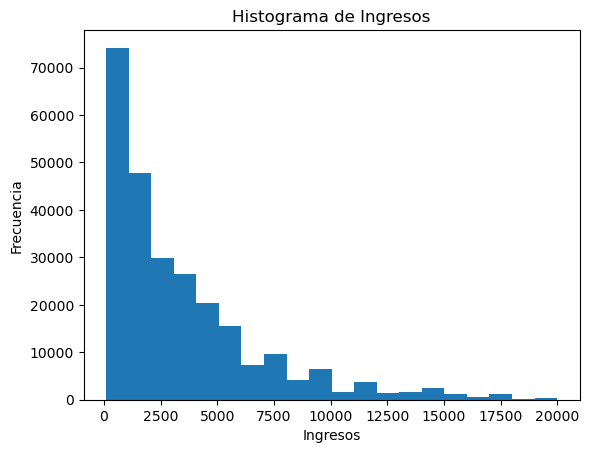

In [ ]:
# Historigrama de 'ing_1' de la tabla ingresos (de cada vivienda 'folioviv')
ing_1_filtered = ingresos_enigh_copy[(ingresos_enigh_copy['ing_1'] > 100) & (ingresos_enigh_copy['ing_1'] < 20000)]
plt.hist(ing_1_filtered['ing_1'], bins=20)
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Ingresos')
plt.show()

In [77]:
ingresos_enigh_copy[(ingresos_enigh_copy['ing_1'] > 0) & (ingresos_enigh_copy['ing_1'] < 1000)]

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
7,100252303,1,2,P069,8.0,7.0,6.0,5.0,4.0,3.0,170,170,170,170,170,170,498.91
14,100252304,1,3,P077,8.0,7.0,6.0,5.0,4.0,3.0,850,850,850,850,0,0,1663.04
57,100260806,1,3,P001,9.0,8.0,7.0,6.0,5.0,4.0,400,400,400,400,400,400,1180.32
67,100277401,1,4,P005,8.0,7.0,6.0,5.0,4.0,3.0,300,300,300,300,300,300,880.43
71,100277402,2,3,P063,8.0,7.0,6.0,5.0,4.0,3.0,550,0,0,0,0,0,269.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334313,3260572905,1,2,P072,10.0,9.0,8.0,7.0,6.0,5.0,137,137,137,137,137,137,402.06
334314,3260572905,1,1,P072,10.0,9.0,8.0,7.0,6.0,5.0,483,483,483,483,483,483,1417.49
334326,3260578404,1,1,P021,8.0,7.0,6.0,5.0,4.0,3.0,600,500,600,800,500,400,1663.04
334331,3260578405,1,4,P001,8.0,7.0,6.0,5.0,4.0,3.0,900,0,900,900,720,900,2113.04


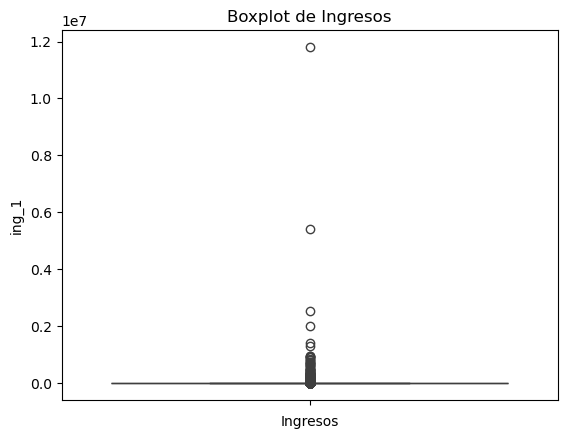

In [33]:
# Boxplot de 'ing_1' de la tabla ingresos
sns.boxplot(ingresos_enigh_copy['ing_1'])
plt.xlabel('Ingresos')
plt.title('Boxplot de Ingresos')
plt.show()

In [ ]:
ingresos_enigh_copy['ing_1']

In [65]:
ingresos_enigh_copy['ing_1'].describe()

count    3.343370e+05
mean     3.710457e+03
std      2.522389e+04
min      0.000000e+00
25%      3.000000e+02
50%      1.500000e+03
75%      4.400000e+03
max      1.181250e+07
Name: ing_1, dtype: float64

In [21]:
# Espectro de valores de 'ing_1'
ingresos_enigh_copy['ing_1'].describe()

count    3.343370e+05
mean     3.710457e+03
std      2.522389e+04
min      0.000000e+00
25%      3.000000e+02
50%      1.500000e+03
75%      4.400000e+03
max      1.181250e+07
Name: ing_1, dtype: float64

In [24]:
ingresos_enigh_copy['ing_1'].head()

0    20000
1     1200
2    10000
3     8000
4     1100
Name: ing_1, dtype: int64

#### **3° Combinación de Datos**

In [311]:
# Unir todas las tablas (menos viviendas) con respecto a la columna 'folioviv'
# df = hogares_copy.merge(poblacion_copy, on='folioviv', how='inner')

In [312]:
df = hogares_copy.merge(erogaciones_copy, on='folioviv', how='left')
df = df.drop_duplicates(subset='folioviv')

In [313]:
df = df.merge(gastoshogar_copy, on='folioviv', how='left', suffixes=('_left', '_right'))
df = df.drop_duplicates(subset='folioviv')

In [314]:
df = df.merge(gastotarjetas_copy, on='folioviv', how='left', suffixes=('_df', '_gastotarjetas'))
df = df.drop_duplicates(subset='folioviv')

In [315]:
df = df.merge(ingresos_enigh_copy, on='folioviv', how='left', suffixes=('_df', '_ingresos'))
df = df.drop_duplicates(subset='folioviv')

In [316]:
# # Drop the conflicting column from one of the DataFrames
# concentradohogar_copy = concentradohogar_copy.drop(columns=['foliohog'])

# # Perform the merge
# df = df.merge(concentradohogar_copy, on='folioviv', how='inner')

In [317]:
# Drop the conflicting column from one of the DataFrames
trabajos_copy = trabajos_copy.drop(columns=['foliohog'])

# Perform the merge
df = df.merge(trabajos_copy, on='folioviv', how='left', suffixes=('_df', '_trabajos'))
df = df.drop_duplicates(subset='folioviv')

In [318]:
df = df.merge(viviendas_copy, on='folioviv', how='left')
df = df.drop_duplicates(subset='folioviv')

In [319]:
# Dimensiones de los datos
print('Dimensiones:', df.shape)

Dimensiones: (69169, 80)


In [320]:
df.drop('foliohog_x', axis=1, inplace=True)
df.drop('foliohog_y', axis=1, inplace=True)
df.drop('clave_df', axis=1, inplace=True)
df.drop('foliohog_df', axis=1, inplace=True)
df.drop('foliohog_gastotarjetas', axis=1, inplace=True)
df.drop('gasto_gastotarjetas', axis=1, inplace=True)
df.drop('gasto_tri_gastotarjetas', axis=1, inplace=True)
df.drop('foliohog', axis=1, inplace=True)
df.drop('numren', axis=1, inplace=True)
df.drop('clave_ingresos', axis=1, inplace=True)
df.drop('mes_1', axis=1, inplace=True)
df.drop('mes_2', axis=1, inplace=True)
df.drop('mes_3', axis=1, inplace=True)
df.drop('mes_4', axis=1, inplace=True)
df.drop('mes_5', axis=1, inplace=True)
df.drop('mes_6', axis=1, inplace=True)
df.drop('id_trabajo', axis=1, inplace=True)

df.head(15)

,folioviv,acc_alim1,acc_alim2,telefono,celular,tv_paga,conex_inte,num_auto,num_van,num_pickup,...,viv_usada,tipo_finan,escrituras,tot_resid,tot_hom,tot_muj,tot_hog,ubica_geo,tam_loc,est_socio
0,100146202,2,2,1,1,1,1,0,1,0,...,1,5,1,3,1,2,1,10010000,1,3
1,100146204,2,2,2,1,2,1,0,0,0,...,,,,4,3,1,4,10010000,1,3
2,100146205,2,2,1,2,1,1,1,0,0,...,1,3,1,2,0,2,1,10010000,1,3
3,100146206,1,2,1,1,2,1,0,0,0,...,,,,2,0,2,1,10010000,1,3
4,100159301,1,2,1,1,1,1,3,0,1,...,2,5,1,5,4,1,1,10010000,1,3
5,100159302,2,1,1,1,2,2,0,0,0,...,,,,2,0,2,1,10010000,1,3
6,100159303,2,2,2,1,1,2,0,0,0,...,1,1,1,1,0,1,1,10010000,1,3
7,100159304,2,2,1,1,2,1,0,0,0,...,,,1,5,3,2,1,10010000,1,3
8,100159305,2,2,1,1,1,1,0,0,0,...,1,1,1,3,1,2,1,10010000,1,3
9,100177801,2,2,1,1,2,1,1,0,0,...,,5,1,5,3,2,1,10010000,1,3


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69169 entries, 0 to 69168
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   folioviv      69169 non-null  int64  
 1   acc_alim1     69169 non-null  int64  
 2   acc_alim2     69169 non-null  int64  
 3   telefono      69169 non-null  int64  
 4   celular       69169 non-null  int64  
 5   tv_paga       69169 non-null  int64  
 6   conex_inte    69169 non-null  int64  
 7   num_auto      69169 non-null  int64  
 8   num_van       69169 non-null  int64  
 9   num_pickup    69169 non-null  int64  
 10  num_moto      69169 non-null  int64  
 11  num_otro      69169 non-null  int64  
 12  num_tvd       69169 non-null  int64  
 13  num_compu     69169 non-null  int64  
 14  consumo       48852 non-null  float64
 15  regalotar     69169 non-null  int64  
 16  regalodado    69169 non-null  int64  
 17  est_alim      69169 non-null  int64  
 18  est_trans     69169 non-nu

In [323]:
# Listar todas las variables categoricas
categoricas = ['acc_alim1', 'acc_alim2', 'telefono', 'celular', 'tv_paga', 'conex_inte', 'consumo', 'regalotar', 'regalodado', 'diconsa', 
              'id_trabajo', 'trapais', 'pago', 'sinco', 'scian', 'clas_emp', 'tam_emp', 'dis_agua', 'disp_elect', 'tenencia', 'pago_mesp',
              'tipo_adqui', 'viv_usada', 'tipo_finan', 'escrituras', 'ubica_geo', 'tam_loc', 'est_socio']

# Listar todas las variables numericas
numericas = ['num_auto', 'num_van', 'num_pickup', 'num_moto', 'num_otro', 'num_tvd', 'num_compu', 'est_alim', 'est_trans', 'otro_pago',
             'ero_1', 'ero_2', 'ero_3', 'ero_4', 'ero_5', 'ero_6', 'gasto_df', 'gasto_tri_df', 'pago_mp', 'ing_1', 'ing_2', 'ing_3', 
             'ing_4', 'ing_5', 'ing_6', 'ing_tri', 'htrab', 'antiguedad', 'renta', 'estim_pago', 'pago_viv', 'total_resid', 'tot_hom',
             'tot_muj', 'tot_hog'] 

#### **4° Guardado de datos**

In [324]:
# Guardar el dataframe como csv
df.to_csv('enigh_filtered.csv', index=False)

# Guardar las listas de columnas categoricas y numericas en .txt
with open('categorical_columns.txt', 'w') as f:
    for item in categoricas:
        f.write("%s\n" % item)

with open('numerical_columns.txt', 'w') as f:
    for item in numericas:
        f.write("%s\n" % item)